### day6.2 데이터 병합 및 조작

In [1]:
import pandas as pd
#시각화 
import matplotlib.pyplot as plt
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

In [2]:
#기온정보 csv파일 읽기
data= pd.read_csv('./data/기온.csv',engine='python')  #한글파일 csv인 경우 engin옵션 필요

In [3]:
data.head()

,지점,일시,평균,최고,최저
0,90,1968-01-01,-0.7,11.4,-11.4
1,90,1968-02-01,-2.1,9.7,-9.9
2,90,1968-03-01,5.9,20.5,-3.2
3,90,1968-04-01,10.5,21.4,4.0
4,90,1968-05-01,14.6,24.5,9.3


In [4]:
len(data)

45555

In [5]:
#지점정보 csv파일 읽기
area= pd.read_csv('./data/지점정보.csv',engine='python')  #한글파일 csv인 경우 engin옵션 필요
area.head()

,지점,지점명,위도,경도
0,3,선봉,42.3167,130.4000
1,5,삼지연,41.8167,128.3167
2,8,청진,41.7833,129.8167
3,14,중강,41.7833,126.8833
4,16,혜산,41.4000,128.1667


In [6]:
len(area)

4272

In [7]:
area.tail()

,지점,지점명,위도,경도
4267,94767,시드니,-33.9333,151.1667
4268,94866,멜보른,-37.6667,144.8500
4269,94926,캔버라,-35.3000,149.2000
4270,96749,쟈카르타,-6.1167,106.6500
4271,98425,마닐라,14.5833,120.9833


#### 지점정보의 중복데이터 확인후 제거 

In [8]:
#데이터에 몇개의 지점이 있는지 중복제거해서 리스트로 담기
df_area = data['지점'].drop_duplicates().tolist()

In [9]:
len(df_area)

102

In [10]:
area[area['지점']==(90)]

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647


In [11]:
area2= area[area['지점'].isin(df_area)]

In [12]:
len(area2)

138

In [13]:
area2.head(10)

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647
29,93,북춘천,37.9475,127.7547
30,93,북춘천,37.9474,127.7544
32,95,철원,38.1479,127.3042
34,98,동두천,37.9019,127.0607
35,99,파주,37.8859,126.7665
36,99,문산,37.8859,126.7665
37,100,대관령,37.6771,128.7183
38,100,대관령,37.6869,128.7587
39,101,춘천,37.9026,127.7357


In [14]:
##area2에도 지점번호가 다시 중복된 데이터가 있음 제거 필요
old =0
droplst =[]
for item in area2.index :
    if area2['지점'][item] == old :
        droplst.append(item)
    old = area2['지점'][item]

droplst  #중복된 지점의 index를 리스트로 담기 

[30,
 36,
 38,
 41,
 42,
 49,
 53,
 55,
 56,
 68,
 70,
 74,
 76,
 77,
 81,
 84,
 85,
 87,
 88,
 106,
 112,
 114,
 116,
 131,
 132,
 139,
 141,
 142,
 145,
 146,
 151,
 153,
 160,
 165,
 172,
 178]

In [15]:
area2=area2.drop(droplst,0)
len(area2)

102

In [16]:
area2.head()

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647
29,93,북춘천,37.9475,127.7547
32,95,철원,38.1479,127.3042
34,98,동두천,37.9019,127.0607
35,99,파주,37.8859,126.7665


In [17]:
data.head()

,지점,일시,평균,최고,최저
0,90,1968-01-01,-0.7,11.4,-11.4
1,90,1968-02-01,-2.1,9.7,-9.9
2,90,1968-03-01,5.9,20.5,-3.2
3,90,1968-04-01,10.5,21.4,4.0
4,90,1968-05-01,14.6,24.5,9.3


####  *프로그램없이 area 중복제거 

In [18]:

area3= area[area['지점'].isin(df_area)]
len(area3)

138

In [19]:
area3.head()

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647
29,93,북춘천,37.9475,127.7547
30,93,북춘천,37.9474,127.7544
32,95,철원,38.1479,127.3042
34,98,동두천,37.9019,127.0607


In [20]:
area3['지점'].duplicated()

27     False
29     False
30      True
32     False
34     False
35     False
36      True
37     False
38      True
39     False
40     False
41      True
42      True
43     False
44     False
45     False
46     False
48     False
49      True
51     False
52     False
53      True
54     False
55      True
56      True
57     False
58     False
59     False
60     False
61     False
       ...  
154    False
155    False
156    False
157    False
158    False
159    False
160     True
161    False
162    False
163    False
164    False
165     True
166    False
167    False
168    False
169    False
170    False
171    False
172     True
173    False
174    False
175    False
176    False
177    False
178     True
179    False
180    False
181    False
182    False
183    False
Name: 지점, Length: 138, dtype: bool

In [21]:
df_area3=pd.DataFrame(area3[['지점','지점명']].duplicated())

In [22]:
df_area3.head()

,0
27,False
29,False
30,True
32,False
34,False


In [23]:
df_area3=df_area3.rename(columns={0:'중복'})

In [24]:
df_area3.head()

,중복
27,False
29,False
30,True
32,False
34,False


In [25]:
area3 = pd.concat([area3,df_area3],axis=1)
area3

,지점,지점명,위도,경도,중복
27,90,속초,38.2509,128.5647,False
29,93,북춘천,37.9475,127.7547,False
30,93,북춘천,37.9474,127.7544,True
32,95,철원,38.1479,127.3042,False
34,98,동두천,37.9019,127.0607,False
35,99,파주,37.8859,126.7665,False
36,99,문산,37.8859,126.7665,False
37,100,대관령,37.6771,128.7183,False
38,100,대관령,37.6869,128.7587,True
39,101,춘천,37.9026,127.7357,False


In [26]:
#중복여부 False인것만 다시 데이터 프레임으로 가져오기 
area4 = area3[area3['중복']==False]
area4

,지점,지점명,위도,경도,중복
27,90,속초,38.2509,128.5647,False
29,93,북춘천,37.9475,127.7547,False
32,95,철원,38.1479,127.3042,False
34,98,동두천,37.9019,127.0607,False
35,99,파주,37.8859,126.7665,False
36,99,문산,37.8859,126.7665,False
37,100,대관령,37.6771,128.7183,False
39,101,춘천,37.9026,127.7357,False
40,102,백령도,37.9740,124.7124,False
42,102,백령,37.9661,124.6305,False


In [27]:
len(area2)

102

In [28]:
area2.head()

,지점,지점명,위도,경도
27,90,속초,38.2509,128.5647
29,93,북춘천,37.9475,127.7547
32,95,철원,38.1479,127.3042
34,98,동두천,37.9019,127.0607
35,99,파주,37.8859,126.7665


In [29]:
data.head()

,지점,일시,평균,최고,최저
0,90,1968-01-01,-0.7,11.4,-11.4
1,90,1968-02-01,-2.1,9.7,-9.9
2,90,1968-03-01,5.9,20.5,-3.2
3,90,1968-04-01,10.5,21.4,4.0
4,90,1968-05-01,14.6,24.5,9.3


In [31]:
df = pd.merge(data,area2, on ='지점',how='inner')

In [32]:
len(df)

45555

In [33]:
df.head()

,지점,일시,평균,최고,최저,지점명,위도,경도
0,90,1968-01-01,-0.7,11.4,-11.4,속초,38.2509,128.5647
1,90,1968-02-01,-2.1,9.7,-9.9,속초,38.2509,128.5647
2,90,1968-03-01,5.9,20.5,-3.2,속초,38.2509,128.5647
3,90,1968-04-01,10.5,21.4,4.0,속초,38.2509,128.5647
4,90,1968-05-01,14.6,24.5,9.3,속초,38.2509,128.5647


In [35]:
df['년도'] =pd.to_datetime(df['일시']).dt.year

In [36]:
df['월'] =pd.to_datetime(df['일시']).dt.month

In [40]:
df.dtypes

지점       int64
일시      object
평균     float64
최고     float64
최저     float64
지점명     object
위도     float64
경도     float64
년도       int64
월        int64
dtype: object

In [41]:
df['일시']=pd.to_datetime(df['일시'])
df.dtypes

지점              int64
일시     datetime64[ns]
평균            float64
최고            float64
최저            float64
지점명            object
위도            float64
경도            float64
년도              int64
월               int64
dtype: object

In [42]:
df.head()

,지점,일시,평균,최고,최저,지점명,위도,경도,년도,월
0,90,1968-01-01,-0.7,11.4,-11.4,속초,38.2509,128.5647,1968,1
1,90,1968-02-01,-2.1,9.7,-9.9,속초,38.2509,128.5647,1968,2
2,90,1968-03-01,5.9,20.5,-3.2,속초,38.2509,128.5647,1968,3
3,90,1968-04-01,10.5,21.4,4.0,속초,38.2509,128.5647,1968,4
4,90,1968-05-01,14.6,24.5,9.3,속초,38.2509,128.5647,1968,5


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45555 entries, 0 to 45554
Data columns (total 10 columns):
지점     45555 non-null int64
일시     45555 non-null datetime64[ns]
평균     45093 non-null float64
최고     45554 non-null float64
최저     45551 non-null float64
지점명    45555 non-null object
위도     45555 non-null float64
경도     45555 non-null float64
년도     45555 non-null int64
월      45555 non-null int64
dtypes: datetime64[ns](1), float64(5), int64(3), object(1)
memory usage: 3.8+ MB


In [49]:
#8월 데이터만 가져오기
df_8 = df[df['월']==8]

In [58]:
df_8.tail()

,지점,일시,평균,최고,최저,지점명,위도,경도,년도,월
45495,295,2014-08-01,24.7,33.5,17.9,남해,34.8166,127.9264,2014,8
45507,295,2015-08-01,25.6,34.7,18.3,남해,34.8166,127.9264,2015,8
45519,295,2016-08-01,27.6,37.5,16.7,남해,34.8166,127.9264,2016,8
45531,295,2017-08-01,27.1,36.9,17.4,남해,34.8166,127.9264,2017,8
45543,295,2018-08-01,28.0,36.6,20.1,남해,34.8166,127.9264,2018,8


In [61]:
## 연도별 지점별로 groupby 로 평균, 최고 , 최저 기온 데이터 가져오기
df8g = df_8.groupby(['지점명','년도'])['평균','최고','최저'].mean()

In [62]:
df8g.head()

평균    최고    최저
지점명 년도                    
강릉  1960  25.2  34.8  17.9
    1961  25.4  34.9  17.0
    1962  25.0  35.1  18.6
    1963  24.6  32.4  18.2
    1964  25.6  35.3  19.7

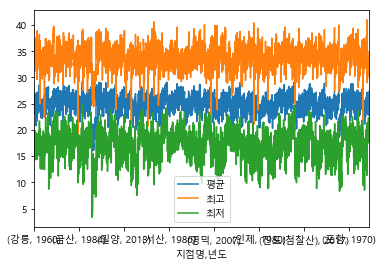

In [63]:
df8g.plot()

In [85]:
#주요 지역 추출
mainarea = ['서울','부산','대구','광주','대전','제주','강릉']
dfMain = df_8[df_8['지점명'].isin(mainarea)]

mainyear = list(range(1970,2018))
dfMain = dfMain[dfMain['년도'].isin(mainyear)]

dfMain.head()

,지점,일시,평균,최고,최저,지점명,위도,경도,년도,월
3204,105,1970-08-01,23.8,33.3,18.8,강릉,37.7515,128.891,1970,8
3216,105,1971-08-01,23.1,36.1,14.9,강릉,37.7515,128.891,1971,8
3228,105,1972-08-01,24.3,35.6,15.9,강릉,37.7515,128.891,1972,8
3240,105,1973-08-01,26.5,37.2,18.8,강릉,37.7515,128.891,1973,8
3252,105,1974-08-01,24.2,34.4,15.2,강릉,37.7515,128.891,1974,8


In [86]:
dfMain_year = dfMain.groupby(['지점명','년도'])['최고'].mean()
dfMain_year

지점명  년도  
강릉   1970    33.3
     1971    36.1
     1972    35.6
     1973    37.2
     1974    34.4
     1975    36.2
     1976    33.5
     1977    35.5
     1978    35.3
     1979    34.4
     1980    31.2
     1981    35.4
     1982    34.7
     1983    37.6
     1984    36.7
     1985    36.0
     1986    34.1
     1987    31.4
     1988    34.7
     1989    33.9
     1990    34.6
     1991    31.0
     1992    29.6
     1993    31.8
     1994    38.9
     1995    35.8
     1996    34.0
     1997    35.6
     1998    33.8
     1999    31.5
             ... 
제주   1988    33.5
     1989    32.5
     1990    37.0
     1991    33.2
     1992    33.0
     1993    29.5
     1994    33.7
     1995    35.8
     1996    35.5
     1997    33.5
     1998    37.4
     1999    32.5
     2000    33.2
     2001    35.0
     2002    33.4
     2003    33.9
     2004    34.3
     2005    34.7
     2006    34.0
     2007    33.7
     2008    34.0
     2009    33.4
     2010    35.8
     2011    34.7


In [87]:
dfMain_year = dfMain_year.reset_index()
dfMain_year.head()

,지점명,년도,최고
0,강릉,1970,33.3
1,강릉,1971,36.1
2,강릉,1972,35.6
3,강릉,1973,37.2
4,강릉,1974,34.4


In [88]:
dfMain_year.tail()

,지점명,년도,최고
331,제주,2013,35.7
332,제주,2014,30.0
333,제주,2015,35.5
334,제주,2016,34.4
335,제주,2017,35.7


In [89]:
#피벗테이블 만들기
df3 = dfMain_year.pivot('년도','지점명','최고')
df3 = df3.reset_index()
df3.head()

지점명,년도,강릉,광주,대구,대전,부산,서울,제주
0,1970,33.3,35.2,34.8,34.5,31.4,35.0,35.8
1,1971,36.1,34.5,36.3,34.1,32.8,33.2,34.6
2,1972,35.6,32.6,35.1,33.7,31.4,32.1,32.5
3,1973,37.2,35.5,37.0,34.0,32.8,35.2,33.2
4,1974,34.4,34.0,37.0,35.0,30.8,33.9,33.6


In [90]:
df3 = df3.set_index('년도')
df3.head()

지점명,강릉,광주,대구,대전,부산,서울,제주
년도,,,,,,,
1970,33.3,35.2,34.8,34.5,31.4,35.0,35.8
1971,36.1,34.5,36.3,34.1,32.8,33.2,34.6
1972,35.6,32.6,35.1,33.7,31.4,32.1,32.5
1973,37.2,35.5,37.0,34.0,32.8,35.2,33.2
1974,34.4,34.0,37.0,35.0,30.8,33.9,33.6


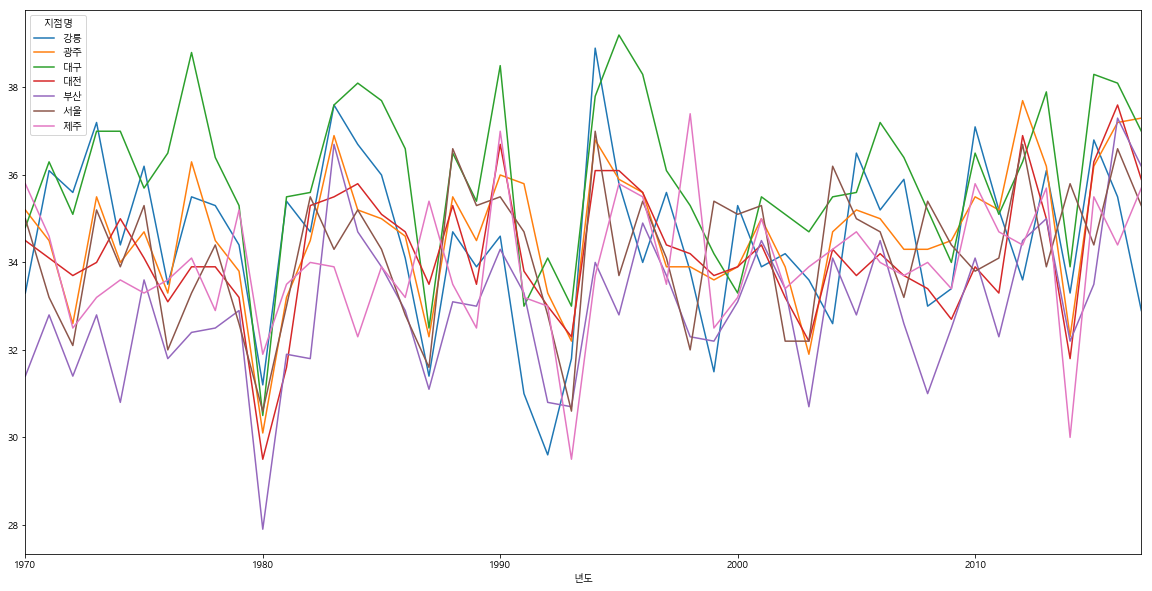

In [91]:
df3.plot(figsize=(20,10))
plt.show()

In [92]:
import seaborn as sns

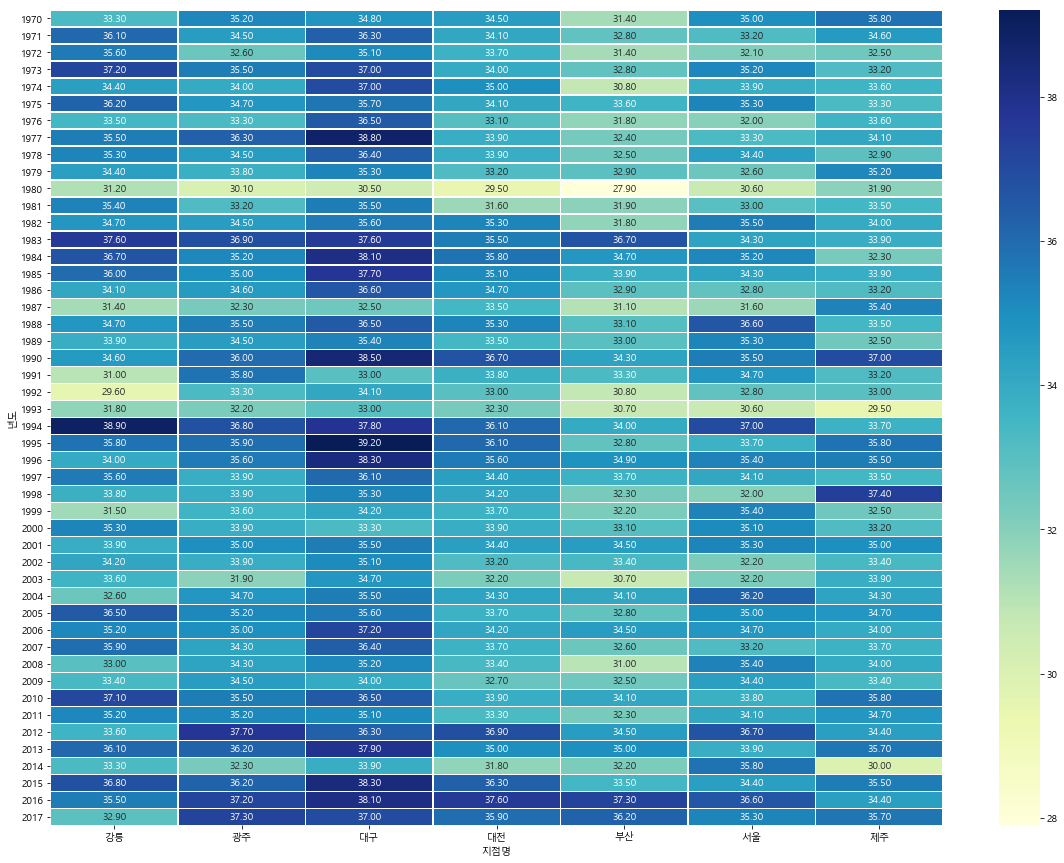

In [93]:
plt.figure(figsize=(20,15))
sns.heatmap(data = df3, annot=True, fmt ='.2f', linewidths=.5, cmap='YlGnBu')